In [7]:
#For data reading and data manipulation
import pandas as pd
import numpy as np
import statistics as st

#For visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#For model creation and model evalution
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from datetime import datetime

In [8]:
data = pd.read_csv(r"D:\kaggle\Chennai houseing sale.csv")

In [9]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [10]:
data.shape

(7109, 22)

In [11]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [12]:
#Caps columns are changed to lower case columns
data.columns = [column.lower() for column in data.columns]

In [13]:
data.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price'],
      dtype='object')

In [14]:
data.drop(columns = ['prt_id','reg_fee','commis'], inplace = True)

In [15]:
data.shape

(7109, 19)

# Data Cleaning

In [16]:
data.isnull().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

In [17]:
st.mean(data['qs_overall']),st.median(data['qs_overall'])

(nan, 2.8)

In [18]:
st.mode(data['n_bedroom'])

1.0

In [19]:
st.mode(data['n_bathroom'])

1.0

In [20]:
#Filling the missing values
#n_bedroom,n_bathroom are categorical variable columns so, filling the null values in mode using statistical techniques.
#qs_overall continuous variable column so, mean() will be using. there st.mean()also used.
data = data.fillna({"n_bedroom":st.mode(data['n_bedroom']),
                    "n_bathroom":st.mode(data['n_bathroom']),
                    "qs_overall":data['qs_overall'].mean()})

In [21]:
data.isna().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
dtype: int64

In [22]:
#check the data format are correct format or not
data.dtypes

area              object
int_sqft           int64
date_sale         object
dist_mainroad      int64
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
sales_price        int64
dtype: object

In [23]:
#correcting data type n_bedroom and n_bathroom
data['n_bedroom'] = data['n_bedroom'].astype(int)
data['n_bathroom'] = data['n_bathroom'].astype(int)

In [24]:
#correcting data type date_build and date_sales
data['date_sale'] = pd.to_datetime(data['date_sale'],format="%d-%m-%Y")
data['date_build'] = pd.to_datetime(data['date_build'],format="%d-%m-%Y")

In [25]:
data.dtypes

area                     object
int_sqft                  int64
date_sale        datetime64[ns]
dist_mainroad             int64
n_bedroom                 int32
n_bathroom                int32
n_room                    int64
sale_cond                object
park_facil               object
date_build       datetime64[ns]
buildtype                object
utility_avail            object
street                   object
mzzone                   object
qs_rooms                float64
qs_bathroom             float64
qs_bedroom              float64
qs_overall              float64
sales_price               int64
dtype: object

In [26]:
#Which year are sale the build
data['date_sale'].dt.year

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: date_sale, Length: 7109, dtype: int32

In [27]:
#Which year are build the building
data['date_build'].dt.year

0       1967
1       1995
2       1992
3       1988
4       1979
        ... 
7104    1962
7105    1995
7106    1978
7107    1977
7108    1961
Name: date_build, Length: 7109, dtype: int32

In [28]:
data['house_age'] = data['date_sale'].dt.year - data['date_build'].dt.year

In [29]:
data['house_age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: house_age, Length: 7109, dtype: int32

In [30]:
data.drop(columns=["date_sale","date_build"],inplace=True)

In [31]:
data.shape

(7109, 18)

In [32]:
data['area'].value_counts()

area
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64

In [33]:
#For the area column have many spelling mistakes so its replace.
data['area'] = data['area'].replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet","TNagar":"T Nagar",
                                     "Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Ana Nagar":"Anna Nagar",
                                     "KKNagar":"KK Nagar","Velchery":"Velachery","Adyr":"Adyar"
                                     })

In [34]:
data['area'].value_counts()

area
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

# sale_cond

In [35]:
data['sale_cond'].value_counts()

sale_cond
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64

In [36]:
#For the area column have many spelling mistakes so its replace.
data['sale_cond'] = data['sale_cond'].replace({"Adj Land":"AdjLand","Partiall":"Partial",
                                               "PartiaLl":"Partial","Ab Normal":"AbNormal"})

In [37]:
data['sale_cond'].value_counts()

sale_cond
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

# park_facil

In [38]:
data['park_facil'].value_counts()

park_facil
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64

In [39]:
#For the area column have many spelling mistakes so its replace.
data['park_facil'] = data['park_facil'].replace({"Noo":"No"})

In [40]:
data['park_facil'].value_counts()

park_facil
Yes    3587
No     3522
Name: count, dtype: int64

# buildtype

In [41]:
data['buildtype'].value_counts()

buildtype
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype: int64

In [42]:
#For the area column have many spelling mistakes so its replace.
data['buildtype'] = data['buildtype'].replace({"Comercial":"Commercial","Other":"Others"})

In [43]:
data['buildtype'].value_counts()

buildtype
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

# utility_avail

In [44]:
data['utility_avail'].value_counts()

utility_avail
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64

In [45]:
data['utility_avail'] = data['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer',"AllPub"])

In [46]:
data['utility_avail'].value_counts()

utility_avail
No Sewer    3700
AllPub      1887
ELO         1522
Name: count, dtype: int64

# street

In [47]:
data['street'].value_counts()

street
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: count, dtype: int64

In [48]:
data['street'] = data['street'].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [49]:
data['street'].value_counts()

street
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

# mzzone

In [50]:
data['mzzone'].value_counts() #no spelling mistake.

mzzone
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: count, dtype: int64

In [51]:
#duplicates columns are drop
data = data.drop_duplicates()

In [52]:
data.shape

(7109, 18)

# EDA

# Data visualization

In [53]:
#!pip install --upgrade seaborn matplotlib

In [54]:
#pip install --upgrade seaborn

In [55]:
#!pip install seaborn==0.11

In [56]:
data.isnull().sum()

area             0
int_sqft         0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
house_age        0
dtype: int64

In [57]:
order=data['area'].value_counts().index[::-1]
order

Index(['T Nagar', 'Adyar', 'Anna Nagar', 'Velachery', 'KK Nagar', 'Karapakkam',
       'Chrompet'],
      dtype='object', name='area')

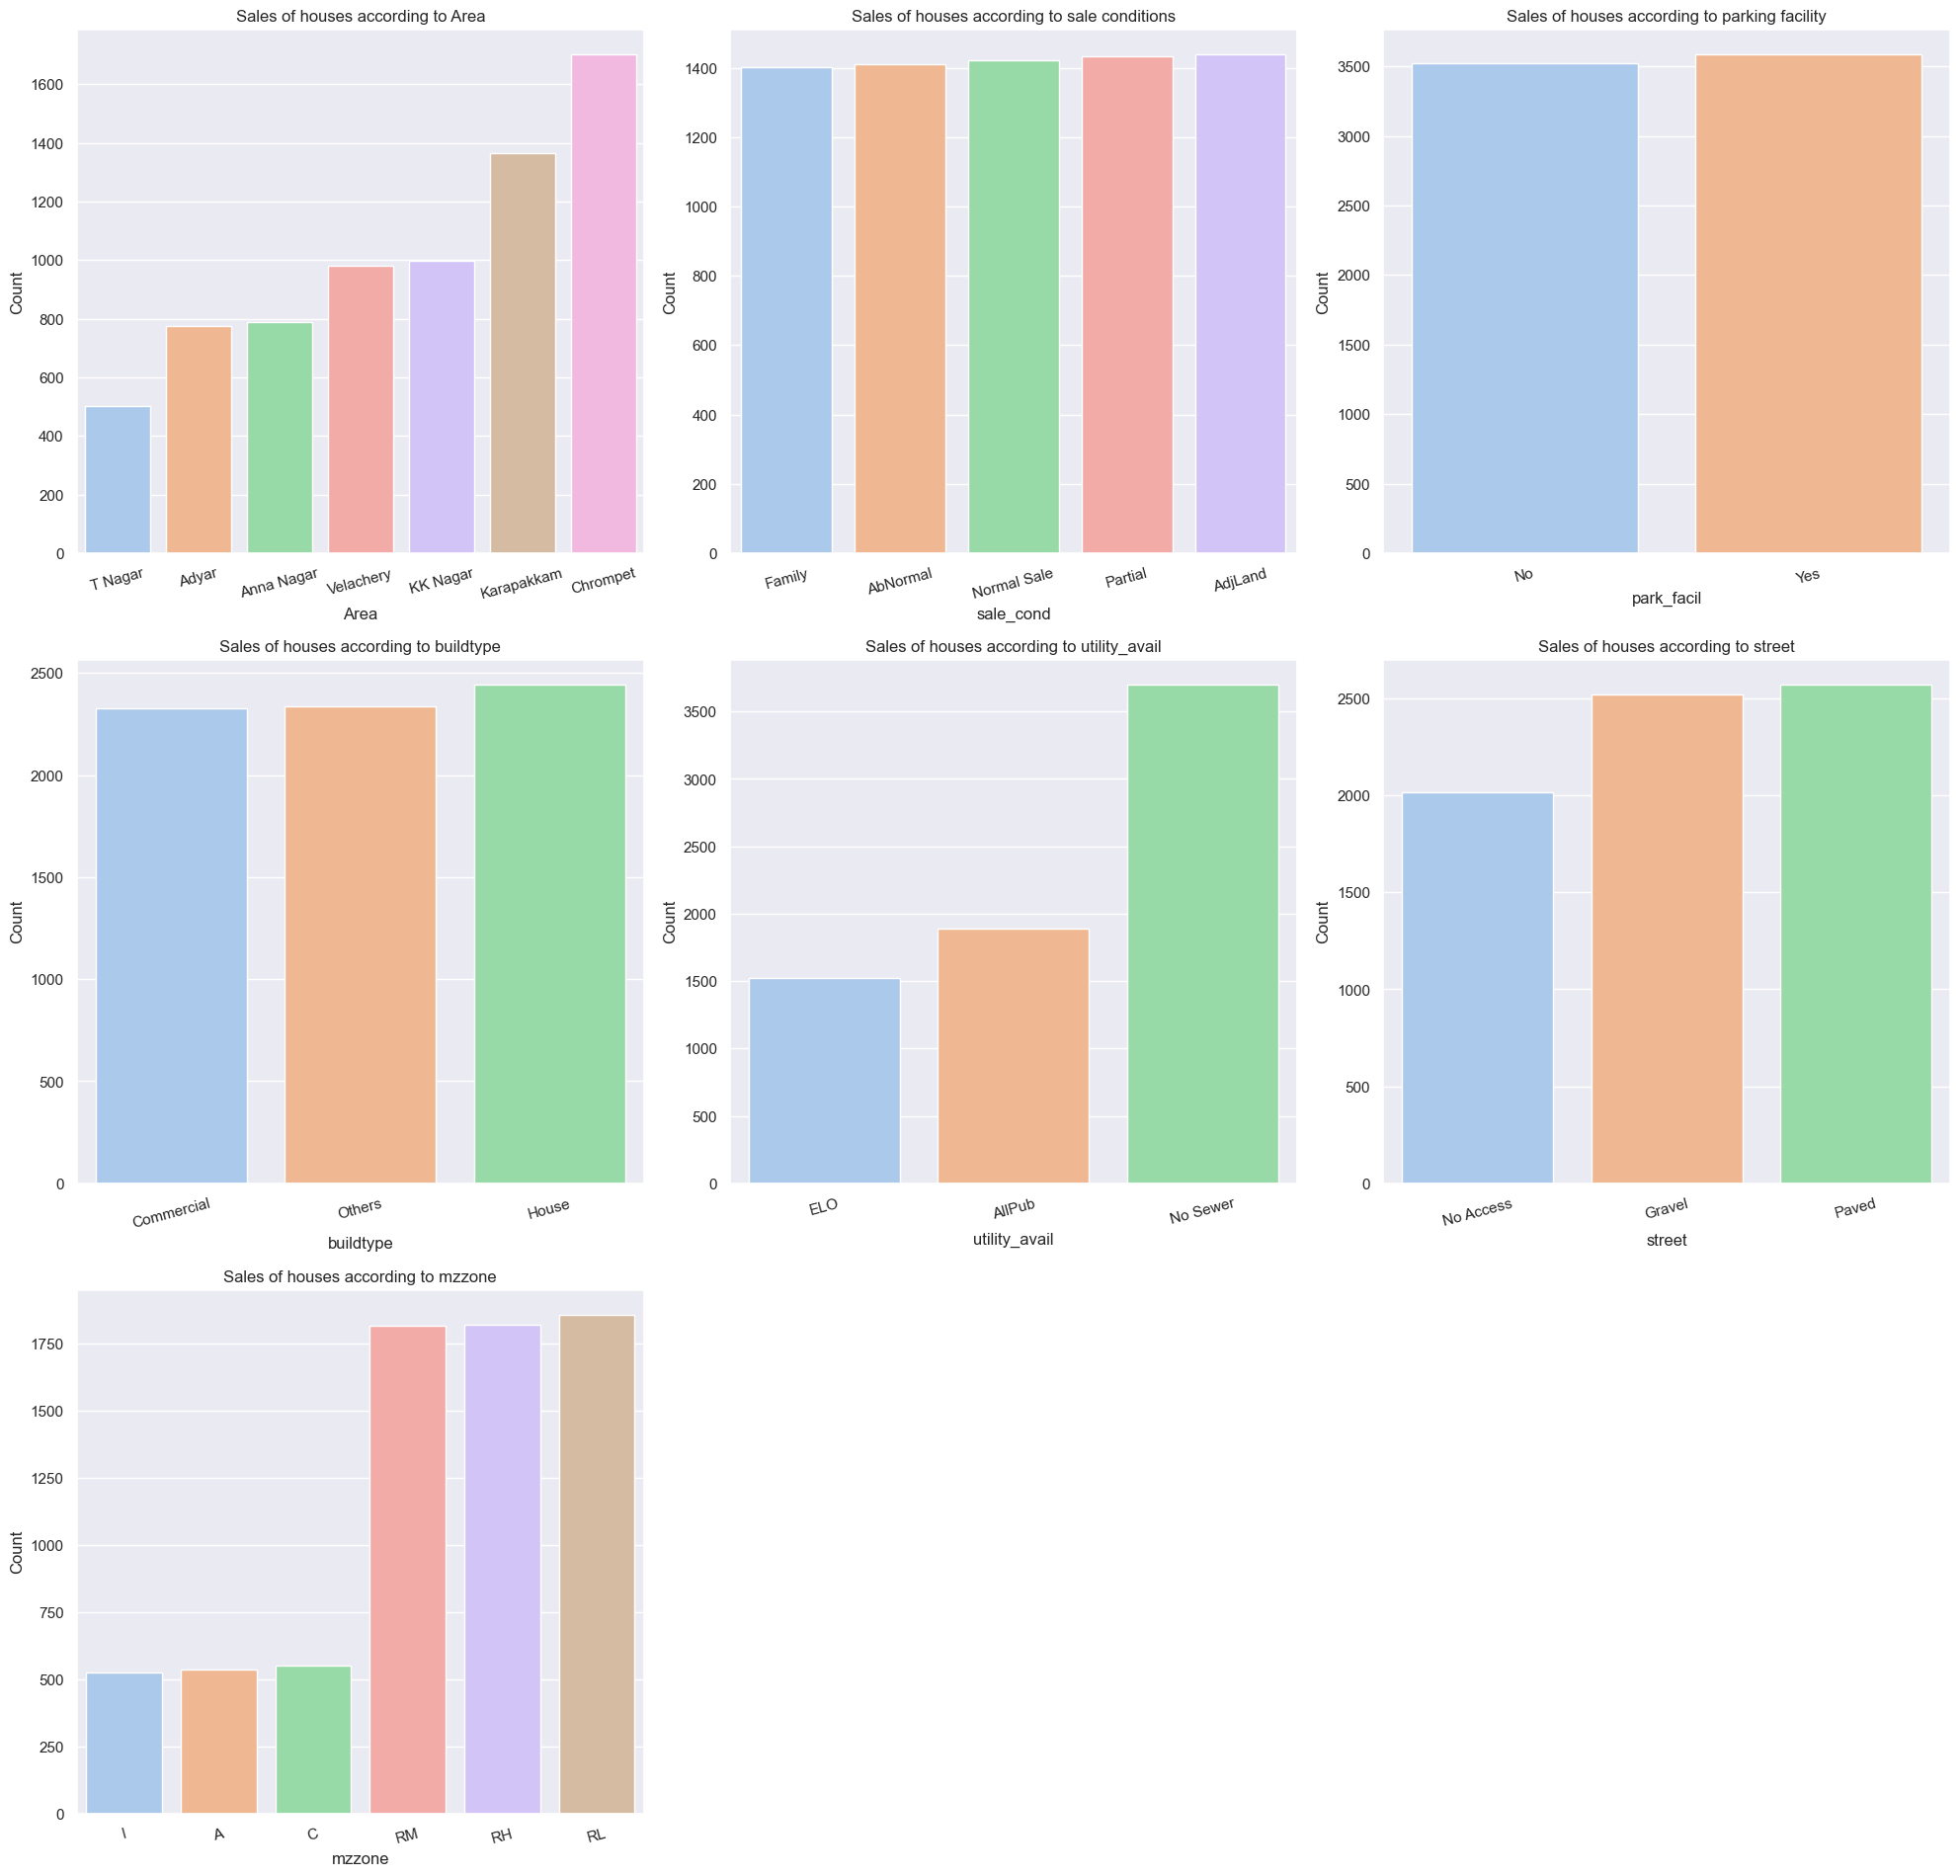

In [58]:
#Plotting count plot for all the categorical columns

sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(20,25)) #breadth,length
#area
plt.subplot(431)
#barplot 0r countplot its same.Barplot panduna order of value_counts ta irrukanum.
sns.countplot(x=data['area'],order=data['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

#sale_cond
plt.subplot(432)
sns.countplot(x=data['sale_cond'],order=data['sale_cond'].value_counts().index[::-1])  
plt.xticks(rotation=15)
plt.xlabel('sale_cond')
plt.ylabel('Count')
plt.title('Sales of houses according to sale conditions')

#park_facil
plt.subplot(433)
sns.countplot(x=data['park_facil'],order=data['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('park_facil')
plt.ylabel('Count')
plt.title('Sales of houses according to parking facility')

#buildtype
plt.subplot(434)
sns.countplot(x=data['buildtype'],order=data['buildtype'].value_counts().index[::-1]) 
plt.xticks(rotation=15)
plt.xlabel('buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to buildtype')

#utility_avail
plt.subplot(435)
sns.countplot(x=data['utility_avail'], order=data['utility_avail'].value_counts().index[::-1])  
plt.xticks(rotation=15)
plt.xlabel('utility_avail')
plt.ylabel('Count')
plt.title('Sales of houses according to utility_avail')

#street
plt.subplot(436)
sns.countplot(x=data['street'],order=data['street'].value_counts().index[::-1]) 
plt.xticks(rotation=15)
plt.xlabel('street')
plt.ylabel('Count')
plt.title('Sales of houses according to street')

#mzzone
plt.subplot(437)
sns.countplot(x=data['mzzone'],order=data['mzzone'].value_counts().index[::-1]) 
plt.xticks(rotation=15)
plt.xlabel('mzzone')
plt.ylabel('Count')
plt.title('Sales of houses according to mzzone')

plt.tight_layout()

In [59]:
data.groupby('area')['sales_price'].mean()

area
Adyar         9.185668e+06
Anna Nagar    1.516820e+07
Chrompet      1.001381e+07
KK Nagar      1.269623e+07
Karapakkam    7.340100e+06
T Nagar       1.561674e+07
Velachery     1.104735e+07
Name: sales_price, dtype: float64

In [60]:
data.groupby('area')['sales_price'].mean().reset_index()

,area,sales_price
0,Adyar,9.185668e+06
1,Anna Nagar,1.516820e+07
2,Chrompet,1.001381e+07
3,KK Nagar,1.269623e+07
4,Karapakkam,7.340100e+06
5,T Nagar,1.561674e+07
6,Velachery,1.104735e+07


In [61]:
data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')["area"]

4    Karapakkam
0         Adyar
2      Chrompet
6     Velachery
3      KK Nagar
1    Anna Nagar
5       T Nagar
Name: area, dtype: object

In [62]:
Area_order = data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')["area"]
sale_cond_order = data.groupby("sale_cond")['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = data.groupby("park_facil")['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = data.groupby("buildtype")['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = data.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = data.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')["street"]
mzzone_order = data.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')["mzzone"]

In [63]:
Area_order

4    Karapakkam
0         Adyar
2      Chrompet
6     Velachery
3      KK Nagar
1    Anna Nagar
5       T Nagar
Name: area, dtype: object

Text(0.5, 1.0, 'mzzone vs Mean sales_price')

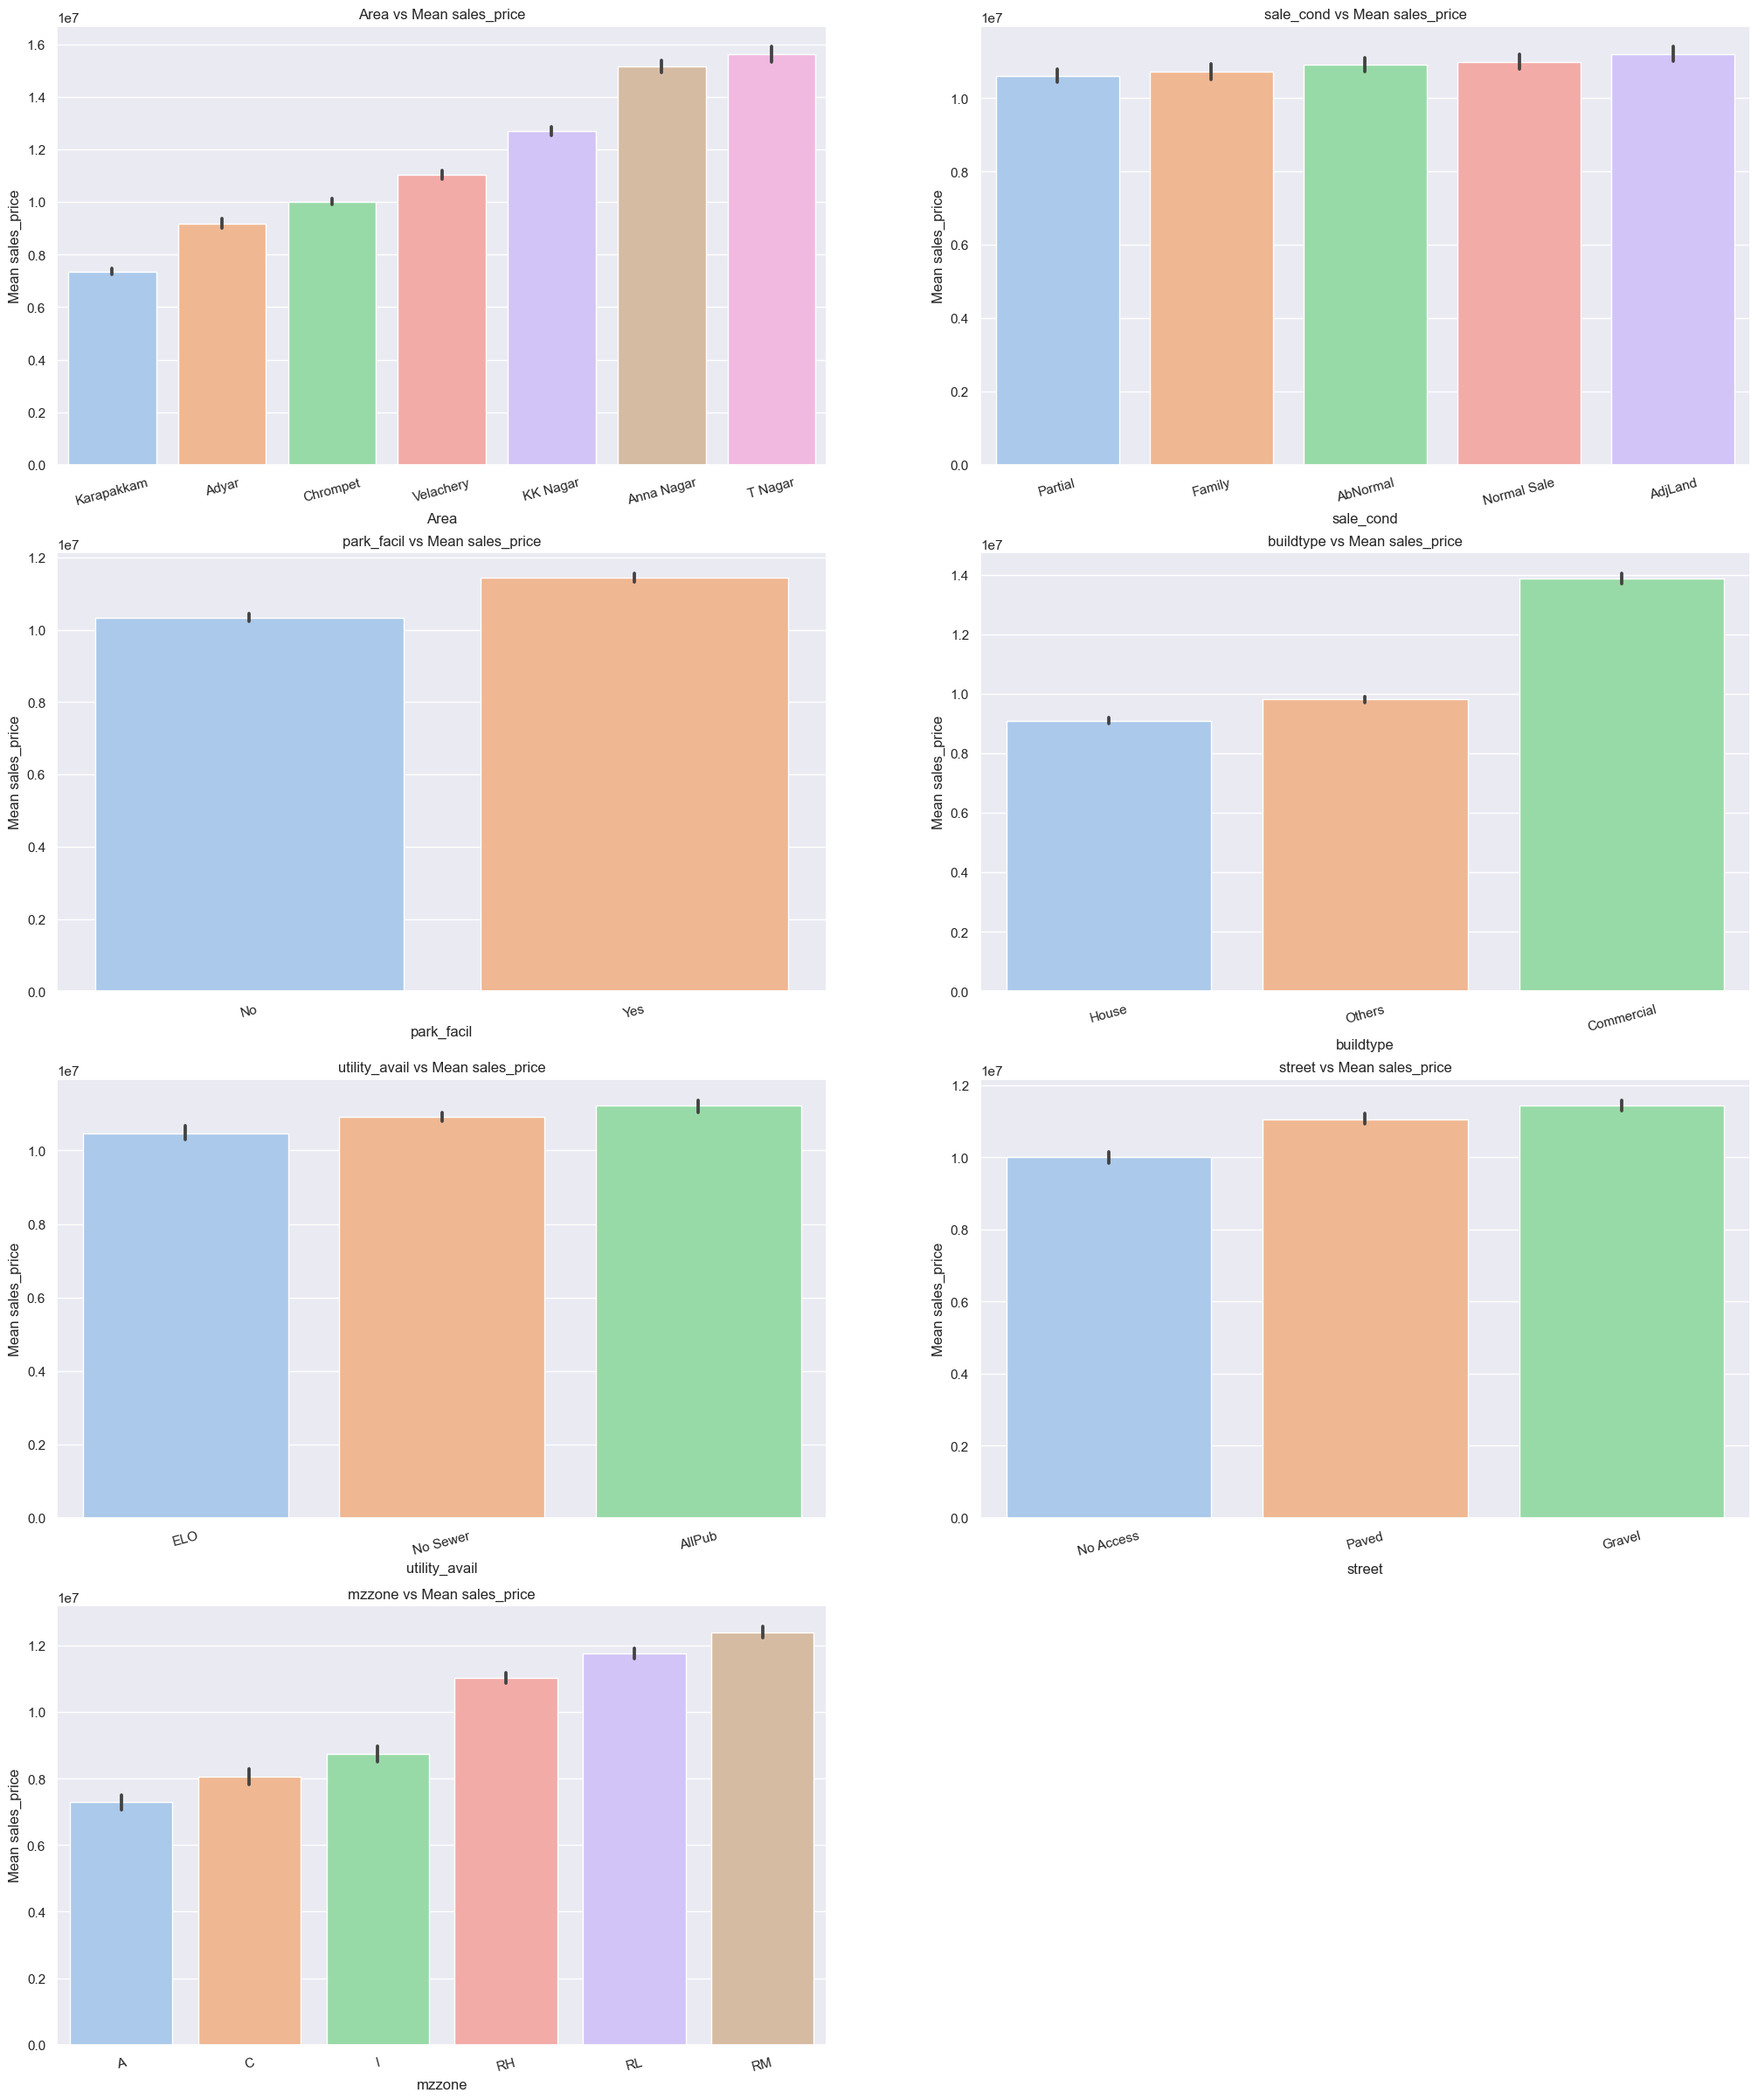

In [64]:
#plotting for feature and target foe all categorical columns
plt.figure(figsize=(25,30))

#Area
plt.subplot(421)
sns.barplot(x=data['area'],y=data['sales_price'],order = Area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean sales_price')
plt.title("Area vs Mean sales_price")

#sale_cond
plt.subplot(422)
sns.barplot(x=data['sale_cond'],y=data['sales_price'],order = sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('sale_cond')
plt.ylabel('Mean sales_price')
plt.title("sale_cond vs Mean sales_price")

#park_facil
plt.subplot(423)
sns.barplot(x=data['park_facil'],y=data['sales_price'],order = park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('park_facil')
plt.ylabel('Mean sales_price')
plt.title("park_facil vs Mean sales_price")

#buildtype
plt.subplot(424)
sns.barplot(x=data['buildtype'],y=data['sales_price'],order = buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('buildtype')
plt.ylabel('Mean sales_price')
plt.title("buildtype vs Mean sales_price")

#utility_avail
plt.subplot(425)
sns.barplot(x=data['utility_avail'],y=data['sales_price'],order = utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('utility_avail')
plt.ylabel('Mean sales_price')
plt.title("utility_avail vs Mean sales_price")

#street
plt.subplot(426)
sns.barplot(x=data['street'],y=data['sales_price'],order = street_order)
plt.xticks(rotation=15)
plt.xlabel('street')
plt.ylabel('Mean sales_price')
plt.title("street vs Mean sales_price")

#mzzone
plt.subplot(427)
sns.barplot(x=data['mzzone'],y=data['sales_price'],order = mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('mzzone')
plt.ylabel('Mean sales_price')
plt.title("mzzone vs Mean sales_price")


# Numerical columns Plot

Text(0.5, 1.0, 'House_age vs Sales_price')

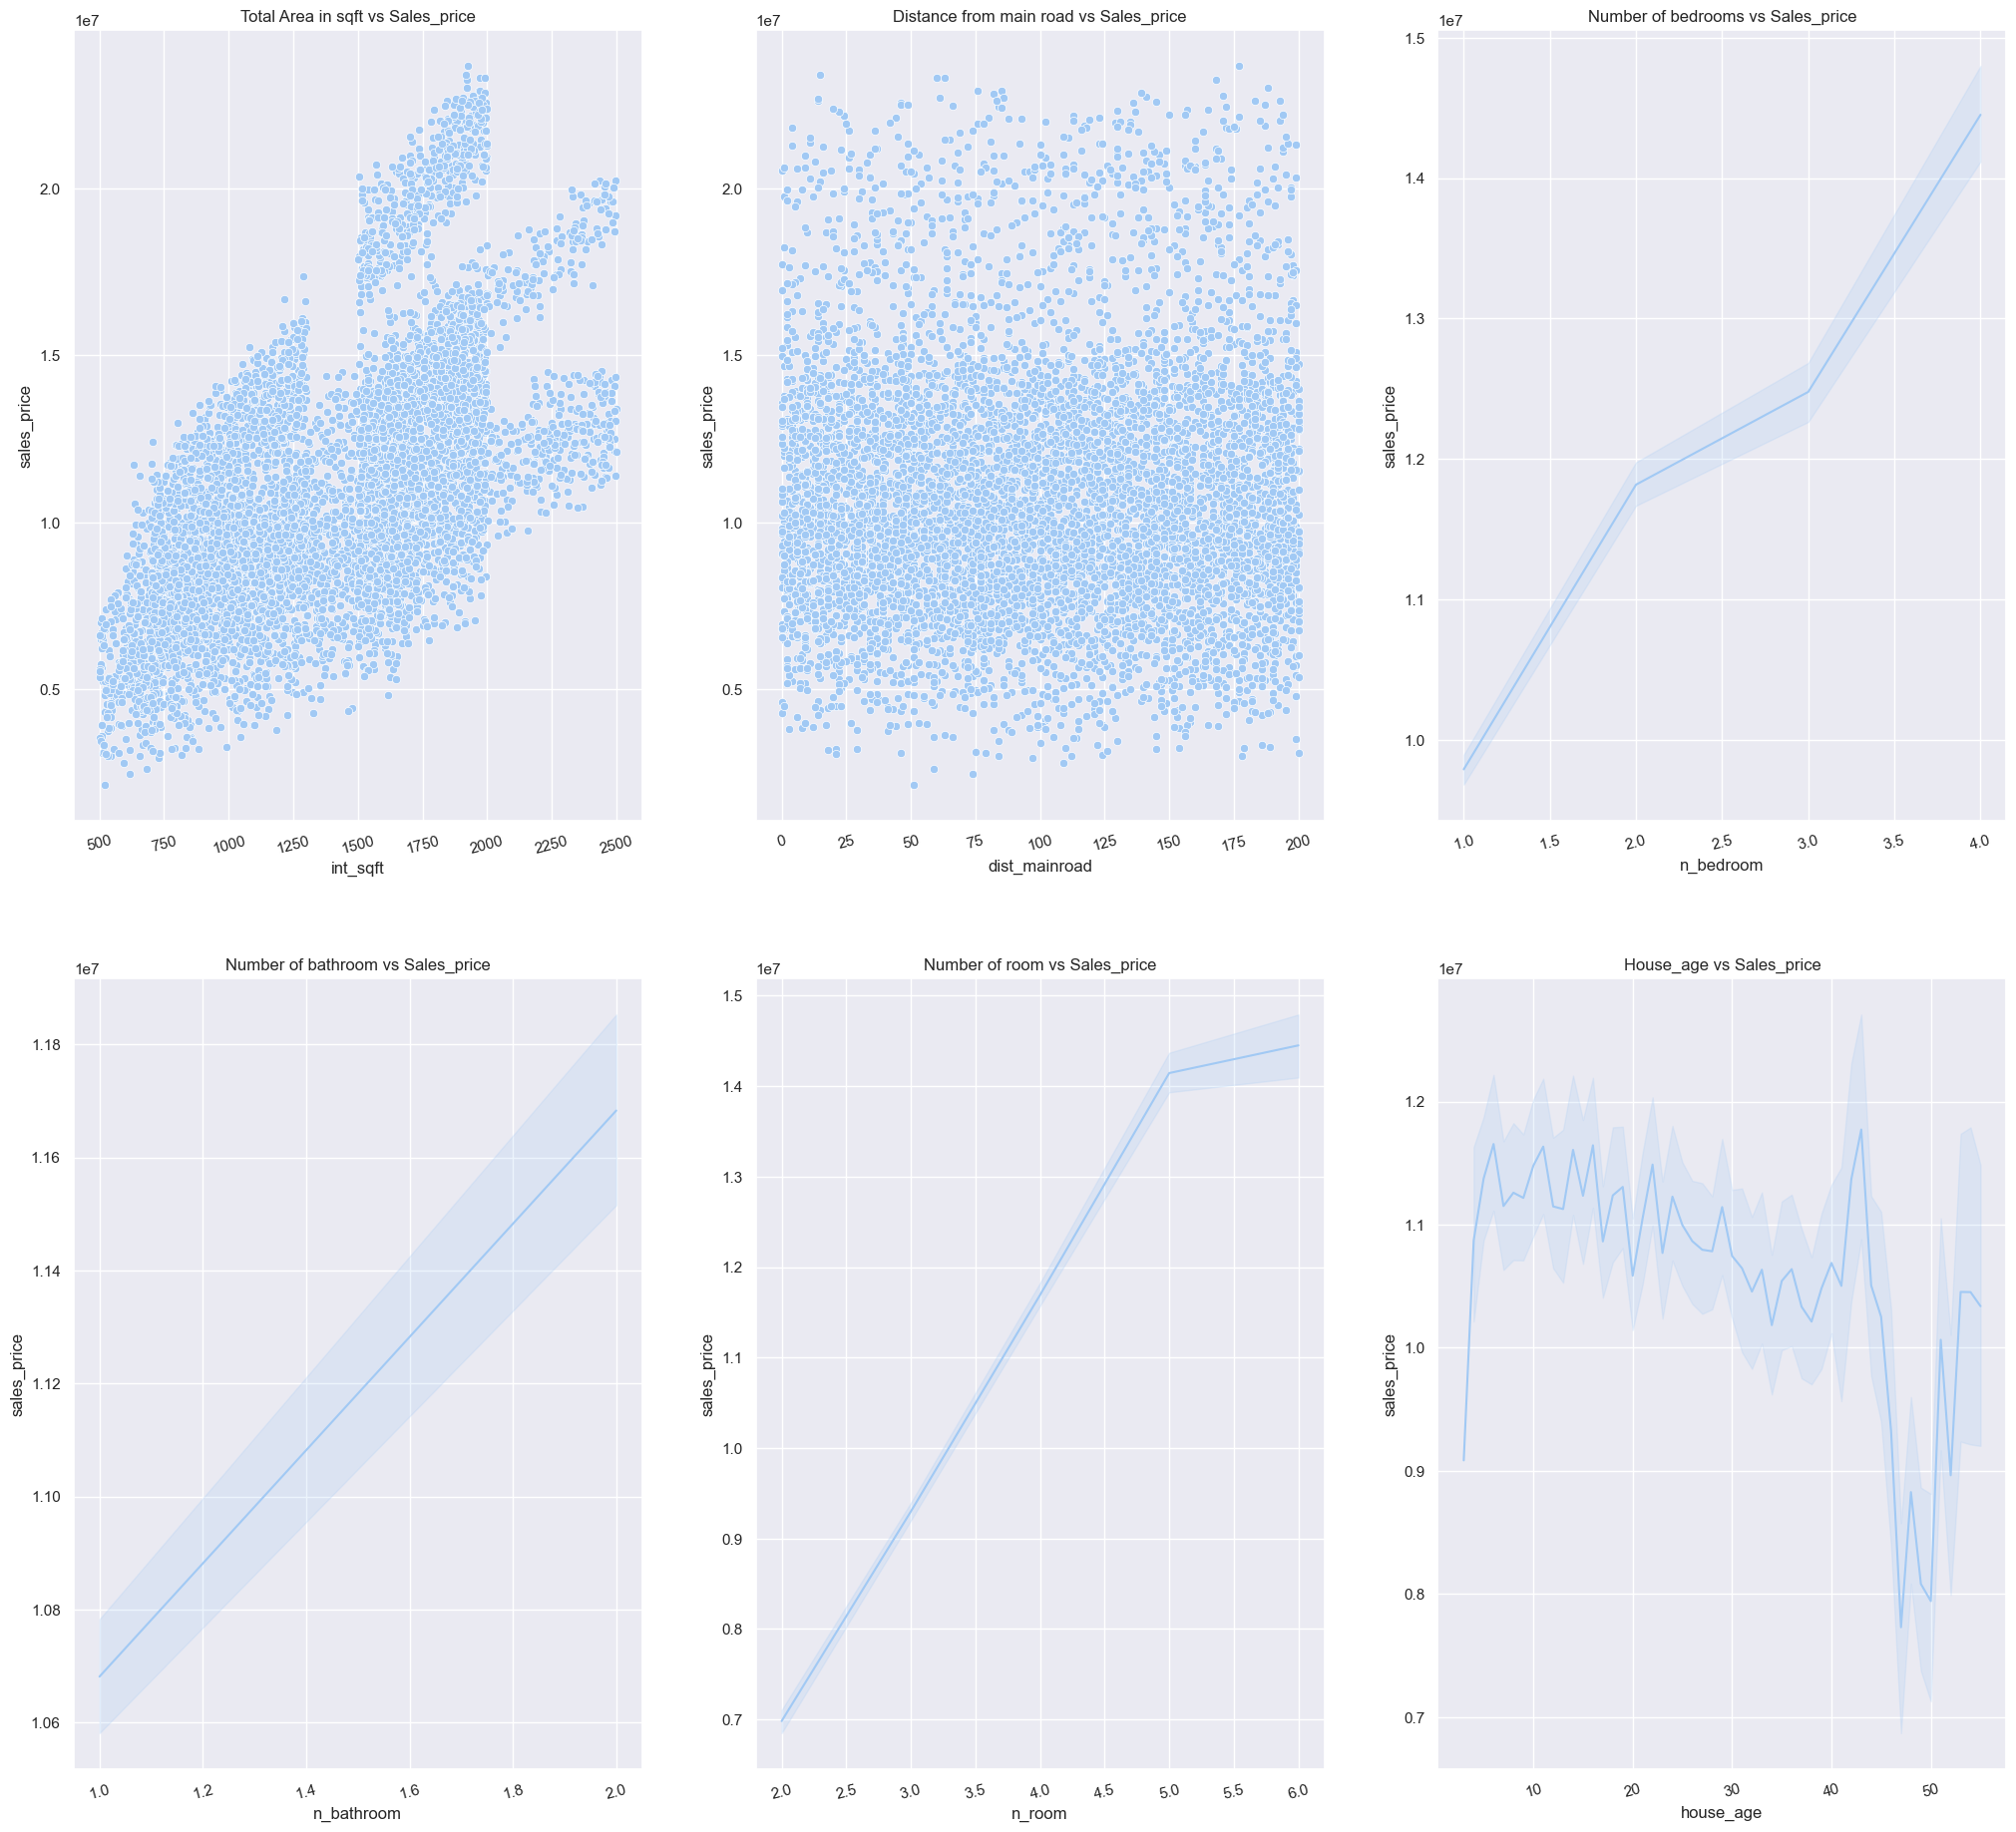

In [65]:
plt.figure(figsize=(25,35))
#int_sqft
plt.subplot(331)
sns.scatterplot(x=data['int_sqft'],y=data['sales_price'])
plt.xticks(rotation=15)
plt.xlabel("int_sqft")
plt.ylabel("sales_price")
plt.title("Total Area in sqft vs Sales_price")

#dist_mainroad
plt.subplot(332)
sns.scatterplot(x=data['dist_mainroad'],y=data['sales_price'])
plt.xticks(rotation=15)
plt.xlabel("dist_mainroad")
plt.ylabel("sales_price")
plt.title("Distance from main road vs Sales_price")

#n_bedroom 
plt.subplot(333)
#sns.scatterplot(x=data['n_bedroom'],y=data['sales_price'])
sns.lineplot(x=data['n_bedroom'],y=data['sales_price'])
plt.xticks(rotation=15)
plt.xlabel("n_bedroom")
plt.ylabel("sales_price")
plt.title("Number of bedrooms vs Sales_price")

#n_bathroom
plt.subplot(334)
#sns.scatterplot(x=data['n_bedroom'],y=data['sales_price'])
sns.lineplot(x=data['n_bathroom'],y=data['sales_price'])
plt.xticks(rotation=15)
plt.xlabel("n_bathroom")
plt.ylabel("sales_price")
plt.title("Number of bathroom vs Sales_price")

#n_room
plt.subplot(335)
#sns.scatterplot(x=data['n_bedroom'],y=data['sales_price'])
sns.lineplot(x=data['n_room'],y=data['sales_price'])
plt.xticks(rotation=15)
plt.xlabel("n_room")
plt.ylabel("sales_price")
plt.title("Number of room vs Sales_price")

#house_age
plt.subplot(336)
#sns.scatterplot(x=data['n_bedroom'],y=data['sales_price'])
sns.lineplot(x=data['house_age'],y=data['sales_price'])
plt.xticks(rotation=15)
plt.xlabel("house_age")
plt.ylabel("sales_price")
plt.title("House_age vs Sales_price")

Text(0.5, 1.0, 'Qs overall vs sales_price')

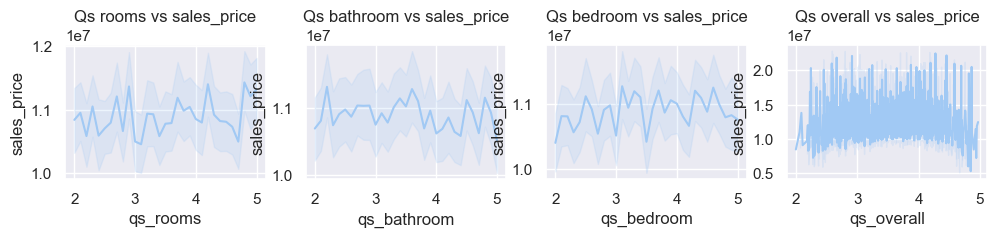

In [66]:
plt.figure(figsize=(15,8))
plt.subplot(451)
sns.lineplot(x=data['qs_rooms'],y=data['sales_price'])
plt.title("Qs rooms vs sales_price")

plt.subplot(452)
sns.lineplot(x=data['qs_bathroom'],y=data['sales_price'])
plt.title("Qs bathroom vs sales_price")

plt.subplot(453)
sns.lineplot(x=data['qs_bedroom'],y=data['sales_price'])
plt.title("Qs bedroom vs sales_price")

plt.subplot(454)
sns.lineplot(x=data['qs_overall'],y=data['sales_price'])
plt.title("Qs overall vs sales_price")

In [67]:
data.head(2)

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11


In [68]:
del data['qs_rooms']
del data['qs_bathroom']
del data['qs_bedroom']
del data['qs_overall']
del data['sale_cond']
del data['utility_avail']
del data['dist_mainroad']

In [69]:
data.head(2)

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,buildtype,street,mzzone,sales_price,house_age
0,Karapakkam,1004,1,1,3,Yes,Commercial,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,Gravel,RH,21717770,11


In [70]:
data.shape

(7109, 11)

In [71]:
mzzone_order

0     A
1     C
2     I
3    RH
4    RL
5    RM
Name: mzzone, dtype: object

# Encoding Categorical variables

In [72]:
#Label encoding.
#label encoding la map() used must better.
data['area'] = data['area'].map({"Karapakkam":0,"Adyar":1,"Chrompet":2,"Velachery":3,"KK Nagar":4,"Anna Nagar":5,"T Nagar":6})
data['park_facil'] = data['park_facil'].map({"No":0,"Yes":1})
data['street'] = data['street'].map({"No Access":0,"Paved":1,"Gravel":2})
data['mzzone'] = data['mzzone'].map({"A":0,"C":1,"I":2,"RH":4,"RL":5,"RM":6})
#one-hot encoding.
data = pd.get_dummies(data,columns=['buildtype'],dtype=int)

In [73]:
data.head(10)

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,sales_price,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,1,7406250,30,0,0,1
5,2,1220,2,1,4,0,0,4,12394750,5,1,0,0
6,2,1167,1,1,3,0,0,5,8488790,28,0,0,1
7,3,1847,3,2,5,0,2,6,16800250,10,1,0,0
8,2,771,1,1,2,0,1,6,8308970,34,0,0,1
9,3,1635,2,1,4,0,0,2,8083650,15,0,0,1


# Split the into input data and output data

In [74]:
x = data.drop("sales_price",axis=1)
y = data['sales_price']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5687, 12) (1422, 12) (5687,) (1422,)


In [77]:
data.shape

(7109, 13)

In [78]:
x_train

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
6333,2,886,1,1,3,0,1,4,9,1,0,0
2112,2,857,1,1,3,1,1,4,18,0,1,0
181,4,1778,3,2,5,0,2,5,8,0,0,1
4781,4,1831,3,2,5,1,2,4,23,0,1,0
794,6,1596,1,1,4,0,1,4,19,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,4,1733,2,1,4,0,2,5,15,1,0,0
5191,0,1459,2,2,4,1,2,4,8,0,1,0
5226,5,1854,2,1,5,1,0,5,21,0,0,1
5390,5,1617,1,1,4,1,2,6,6,0,1,0


In [79]:
x_test

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
457,4,2340,4,2,6,1,1,4,20,0,0,1
1876,0,1344,2,2,4,1,2,2,41,0,1,0
6307,4,1900,3,2,5,1,1,6,25,1,0,0
3182,0,1504,2,2,4,0,2,1,41,0,1,0
1188,3,1910,3,2,5,0,2,2,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6399,4,1724,2,1,4,1,1,4,30,0,1,0
1677,2,1126,1,1,3,0,2,4,18,0,0,1
1634,0,1610,2,2,4,0,2,5,31,1,0,0
1839,0,1494,2,2,4,1,0,5,32,0,1,0


# Build the Model

# Linear Regression

In [80]:
#from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train) #fit means "Develop the model using training dataset"
print(linear_model.predict(x_test))  # model la vichu predict pandaram.
print(y_test)

[13039733.55835074  7525102.93058093 17070010.78279738 ...
 13174151.73206487  8301279.18948355  9206428.88700498]
457     12948200
1876     7524750
6307    16434500
3182     6705750
1188    15831550
          ...   
6399     9774800
1677     8882720
1634    12520250
1839     8188000
1652     8537500
Name: sales_price, Length: 1422, dtype: int64


In [81]:
#"Evaluate the model using test dataset"
linear_model.score(x_test, y_test)

0.9200260525289812

In [82]:
##cross validation vichu evaluate pandanum.
#from sklearn.model_selection import cross_val_score
#syntax: cross_val_score(model,fts_train,target_train,bins).mean()
cross_val_linear_model = cross_val_score(linear_model, x_train, y_train,cv=10).mean()
cross_val_linear_model

0.9173713173296552

# KNN(K Nearest Neighbour)Regression

In [83]:
from sklearn.neighbors import KNeighborsRegressor

# Scaling

In [84]:
from sklearn.preprocessing import StandardScaler #import
scaler = StandardScaler()  #initialise
scaler.fit(x_train) #only taken features
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [85]:
x_train_scaled

array([[-0.296327  , -1.08403926, -0.79539596, ...,  1.42642391,
        -0.73112146, -0.68936709],
       [-0.296327  , -1.14721471, -0.79539596, ..., -0.70105387,
         1.3677618 , -0.68936709],
       [ 0.78567085,  0.85915067,  1.67776797, ..., -0.70105387,
        -0.73112146,  1.45060596],
       ...,
       [ 1.32666977,  1.02471394,  0.44118601, ..., -0.70105387,
        -0.73112146,  1.45060596],
       [ 1.32666977,  0.50841796, -0.79539596, ..., -0.70105387,
         1.3677618 , -0.68936709],
       [-1.37832485, -1.43477197, -0.79539596, ..., -0.70105387,
         1.3677618 , -0.68936709]])

In [86]:
x_test_scaled

array([[ 0.78567085,  2.08344746,  2.91434994, ..., -0.70105387,
        -0.73112146,  1.45060596],
       [-1.37832485, -0.08630272,  0.44118601, ..., -0.70105387,
         1.3677618 , -0.68936709],
       [ 0.78567085,  1.12492328,  1.67776797, ...,  1.42642391,
        -0.73112146, -0.68936709],
       ...,
       [-1.37832485,  0.49316871,  0.44118601, ...,  1.42642391,
        -0.73112146, -0.68936709],
       [-1.37832485,  0.24046688,  0.44118601, ..., -0.70105387,
         1.3677618 , -0.68936709],
       [-0.296327  , -1.10800236, -0.79539596, ..., -0.70105387,
         1.3677618 , -0.68936709]])

In [87]:
knn_values = np.arange(1,50) 
cross_val_knn = []
for k in knn_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)  #initialise
    knn_regressor.fit(x_train_scaled,y_train) #fit 
    print("K value: ",k, "train score: ",knn_regressor.score(x_train_scaled,y_train), "cross_val_score: ",cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean())
    cross_val_knn.append(cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean())

K value:  1 train score:  0.9999966209592491 cross_val_score:  0.9562139344781769
K value:  2 train score:  0.9899885328115259 cross_val_score:  0.962503397450676
K value:  3 train score:  0.9846236746646351 cross_val_score:  0.9634760001447187
K value:  4 train score:  0.9810283969568842 cross_val_score:  0.9641631731214131
K value:  5 train score:  0.9782964320748224 cross_val_score:  0.9637325861592403
K value:  6 train score:  0.9760264108281003 cross_val_score:  0.9630754341813532
K value:  7 train score:  0.9743457182957401 cross_val_score:  0.962468308807248
K value:  8 train score:  0.9730366787170213 cross_val_score:  0.9618536399574993
K value:  9 train score:  0.971299491798784 cross_val_score:  0.9608659328332931
K value:  10 train score:  0.9698184650735943 cross_val_score:  0.9598701838089472
K value:  11 train score:  0.9687172932429469 cross_val_score:  0.9590985958566817
K value:  12 train score:  0.9674533954184747 cross_val_score:  0.9582376673161797
K value:  13 tra

In [123]:
data.columns

Index(['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'park_facil',
       'street', 'mzzone', 'sales_price', 'house_age', 'buildtype_Commercial',
       'buildtype_House', 'buildtype_Others'],
      dtype='object')

In [88]:
#find the best value of k
cross_val_knn_regressor = max(cross_val_knn)
cross_val_knn_regressor

0.9641631731214131

In [89]:
print("The best K-value is 4 and cross_val_score is",cross_val_knn_regressor)

The best K-value is 4 and cross_val_score is 0.9641631731214131


# Implementing K Nearest Neighbor Regression

In [90]:
knn_regressor = KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=4)

In [91]:
cross_val_knn_regressor = cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean()
cross_val_knn_regressor

0.9641631731214131

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
max_depth = np.arange(1,20)
cross_val_dt = []
for d in max_depth:
    dt_regressor = DecisionTreeRegressor(max_depth=d,random_state=0) #insilise
    dt_regressor.fit(x_train,y_train)  #fit
    print("Depth: ",d, "train score: ",dt_regressor.score(x_train,y_train), "cross_val_score: ",cross_val_score(dt_regressor,x_train,y_train,cv=10).mean())
    cross_val_dt.append(cross_val_score(dt_regressor,x_train,y_train,cv=10).mean())

Depth:  1 train score:  0.3614204624470214 cross_val_score:  0.3587393903106909
Depth:  2 train score:  0.6892457250364555 cross_val_score:  0.6871421882415406
Depth:  3 train score:  0.8075208237301582 cross_val_score:  0.8046593229562351
Depth:  4 train score:  0.888918903746675 cross_val_score:  0.8846233313404287
Depth:  5 train score:  0.9231262647949292 cross_val_score:  0.9158879919773414
Depth:  6 train score:  0.9450655292314579 cross_val_score:  0.9375358842925714
Depth:  7 train score:  0.9606540278473223 cross_val_score:  0.950519155277985
Depth:  8 train score:  0.9732565820130955 cross_val_score:  0.9613129368463236
Depth:  9 train score:  0.9828048510475667 cross_val_score:  0.9679356139244483
Depth:  10 train score:  0.9894224453474195 cross_val_score:  0.9717812646747855
Depth:  11 train score:  0.9940446877884624 cross_val_score:  0.9733866795692458
Depth:  12 train score:  0.996829006073808 cross_val_score:  0.9738947211914691
Depth:  13 train score:  0.9984265089117

In [94]:
cross_val_dt_regressor = max(cross_val_dt)
cross_val_dt_regressor

0.9746714818251471

In [95]:
print("The best depth is 13 and cross_val_score is: ",cross_val_dt_regressor)

The best depth is 13 and cross_val_score is:  0.9746714818251471


# Implementing Decision Tree Regression 

In [96]:
dt_regressor = DecisionTreeRegressor(max_depth=13,random_state=0) #insilise
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=13, random_state=0)

In [97]:
cross_val_dt_regressor = cross_val_score(dt_regressor,x_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9746714818251471

In [98]:
#Find the important features.
ftsImp = list(zip(dt_regressor.feature_importances_,data.columns[:-1]))
imp = pd.DataFrame(ftsImp,columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending =False,inplace =True)
imp

,Importance,Feature
0,0.480945,area
9,0.328342,house_age
1,0.111585,int_sqft
7,0.038727,mzzone
5,0.015292,park_facil
6,0.012965,street
8,0.005334,sales_price
11,0.003268,buildtype_House
10,0.002001,buildtype_Commercial
3,0.000783,n_bathroom


# Random Forest

# choose the best max-depth value

In [99]:
#from sklearn.ensemble import RandomForestRegressor ##import
max_depth = np.array([2,4,8,10,11,13,15,16,18,20])
cross_val_rf = []
for d in max_depth:
    rf_Regressor = RandomForestRegressor(max_depth=d, random_state=0) #inislise
    rf_Regressor.fit(x_train,y_train) #Fit
    print("Depth: ",d, "cross_val_score: ",cross_val_score(rf_Regressor,x_train,y_train,cv=10).mean())
    cross_val_rf.append(cross_val_score(rf_Regressor,x_train,y_train,cv=10).mean())

Depth:  2 cross_val_score:  0.687128985972957
Depth:  4 cross_val_score:  0.8920255281648146
Depth:  8 cross_val_score:  0.9762700691235937
Depth:  10 cross_val_score:  0.9857254880806385
Depth:  11 cross_val_score:  0.9873891859488617
Depth:  13 cross_val_score:  0.9884578761573849
Depth:  15 cross_val_score:  0.9886090005965625
Depth:  16 cross_val_score:  0.9886259355835156
Depth:  18 cross_val_score:  0.9886544854567291
Depth:  20 cross_val_score:  0.9886440805102031


In [100]:
cross_val_rf_regressor = max(cross_val_rf)
cross_val_rf_regressor

0.9886544854567291

In [101]:
print("The best depth is 20 and cross_valL_score is: ",cross_val_rf_regressor)

The best depth is 20 and cross_valL_score is:  0.9886544854567291


# Implementing RandomForest Regression

In [102]:
rf_Regressor = RandomForestRegressor(max_depth=20,random_state=0)
rf_Regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [103]:
cross_val_rf_regressor = cross_val_score(rf_Regressor,x_train,y_train,cv=10).mean()
cross_val_rf_regressor

0.9886440805102031

# Extreme Gradient Boosting(XGBoost) Regression

# Choosing the best Learning Rate

In [104]:
#!pip install xgboost

In [105]:
import xgboost as xgb
#from xgboost import XGBRegressor

In [106]:
cross_val_xgb = []
for lr in [0.001,0.02,0.08,0.1,0.2,0.25,0.3]:  #lr is taken small values.
    xgb_regressor = xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
    xgb_regressor.fit(x_train,y_train)
    print("Learning_Rate: ",lr, "cross_val_score: ",cross_val_score(xgb_regressor,x_train,y_train,cv=10).mean())
    cross_val_xgb.append(cross_val_score(xgb_regressor,x_train,y_train,cv=10).mean())

Learning_Rate:  0.001 cross_val_score:  0.16715805239749099
Learning_Rate:  0.02 cross_val_score:  0.9541457979861843
Learning_Rate:  0.08 cross_val_score:  0.993158493484731
Learning_Rate:  0.1 cross_val_score:  0.9933652381087665
Learning_Rate:  0.2 cross_val_score:  0.9934046530253632
Learning_Rate:  0.25 cross_val_score:  0.992927120718566
Learning_Rate:  0.3 cross_val_score:  0.9922633377073398


In [107]:
cross_val_xgb_regressor = max(cross_val_xgb)
cross_val_xgb_regressor

0.9934046530253632

In [108]:
print("The best Learning Rate is 0.2 and cross_valL_score is: ",cross_val_xgb_regressor)

The best Learning Rate is 0.2 and cross_valL_score is:  0.9934046530253632


# Implementing the XGB Regression

In [109]:
xgb_regressor = xgb.XGBRegressor(learning_rate =0.2,n_estimators=100) #initialize the model
xgb_regressor.fit(x_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
cross_val_xgb_regressor = cross_val_score(xgb_regressor,x_train,y_train,cv=10).mean()
cross_val_xgb_regressor

0.9934046530253632

# Cross Validation Score for Machine Learning Models

In [111]:
print("Cross Validation Score for Linear Regression Model :", cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model :", cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model :", cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model :", cross_val_rf_regressor)
print("Cross Validation Score for Extreme Gradient Boosting Regression Model :", cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model : 0.9173713173296552
Cross Validation Score for K-Nearest Neighbors Regression Model : 0.9641631731214131
Cross Validation Score for Decision Tree Regression Model : 0.9746714818251471
Cross Validation Score for Random Forest Regression Model : 0.9886440805102031
Cross Validation Score for Extreme Gradient Boosting Regression Model : 0.9934046530253632


# R2 Score for all Machine Learning Models

In [112]:
from sklearn.metrics import r2_score

In [118]:
y_pred_lr = linear_model.predict(x_test)
y_pred_knn = knn_regressor.predict(x_test)
y_pred_dt = dt_regressor.predict(x_test)
y_pred_rf = rf_Regressor.predict(x_test)
y_pred_xgb = xgb_regressor.predict(x_test)

C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [119]:
R2_score_lr = r2_score(y_test,y_pred_lr)
R2_score_knn = r2_score(y_test,y_pred_knn)
R2_score_dt = r2_score(y_test,y_pred_dt)
R2_score_rf = r2_score(y_test,y_pred_rf)
R2_score_xgb = r2_score(y_test,y_pred_xgb)

In [120]:
print("R2 Score for Linear Regression Model: ",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Model: ",R2_score_knn)
print("R2 Score for Decision Tree Model: ",R2_score_dt)
print("R2 Score for RandomForest Model: ",R2_score_rf)
print("R2 Score for Extreme Gradient Boosting Model: ",R2_score_xgb)

R2 Score for Linear Regression Model:  0.9200260525289812
R2 Score for K-Nearest Neighbors Model:  -1.4405795154340586
R2 Score for Decision Tree Model:  0.9740773424634533
R2 Score for RandomForest Model:  0.9886636702681078
R2 Score for Extreme Gradient Boosting Model:  0.9926407619450586


# Suggestion to Buyers and Sellers- ##Solving Problem statements based on Feature importance 

In [127]:
rf_Regressor.feature_importances_

array([0.47990249, 0.11281906, 0.00055821, 0.00164098, 0.00164966,
       0.01485078, 0.01184235, 0.03823211, 0.00647156, 0.32715221,
       0.00247273, 0.00240785])

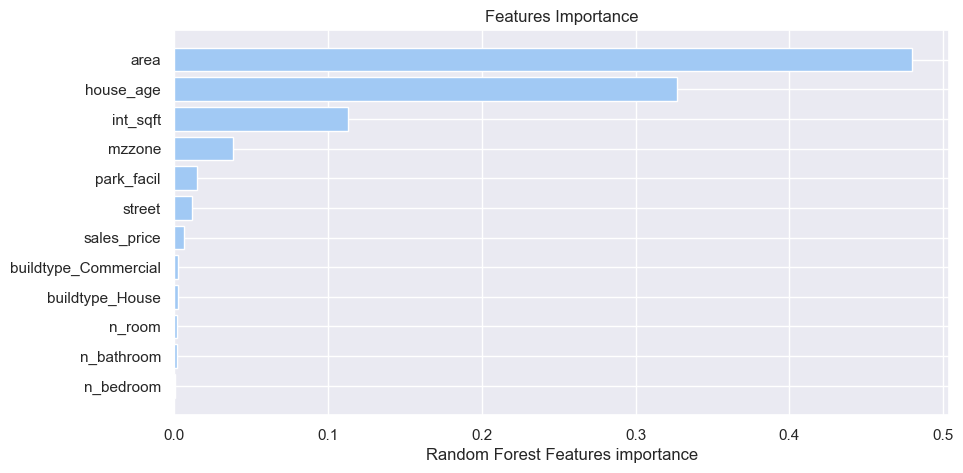

In [128]:
sorted_index = rf_Regressor.feature_importances_.argsort()
plt.figure(figsize=[10,5])
plt.barh(data.columns[sorted_index],rf_Regressor.feature_importances_[sorted_index])
plt.xlabel("Random Forest Features importance")
plt.title("Features Importance")
plt.show()

In [121]:
xgb_regressor.feature_importances_

array([2.8122213e-01, 1.9485781e-02, 9.6786050e-03, 9.4737560e-03,
       1.2459782e-01, 1.3698650e-02, 9.1350041e-03, 2.1310857e-02,
       9.6246868e-04, 4.9818569e-01, 1.2082998e-02, 1.6618958e-04],
      dtype=float32)

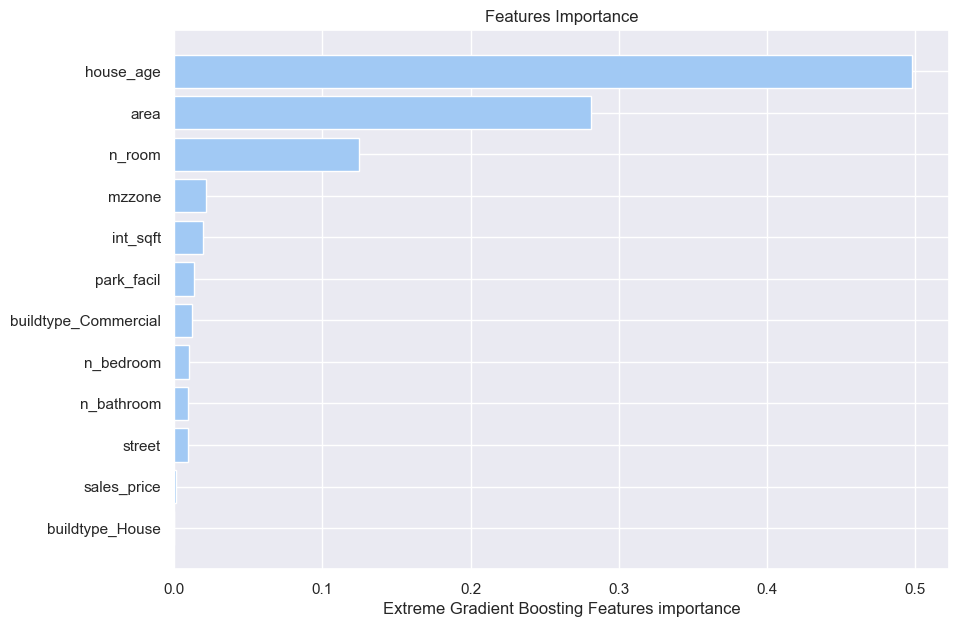

In [125]:
sorted_index = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=[10,7])
plt.barh(data.columns[sorted_index],xgb_regressor.feature_importances_[sorted_index])
plt.xlabel("Extreme Gradient Boosting Features importance")
plt.title("Features Importance")
plt.show()